In [1]:
%matplotlib inline

# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


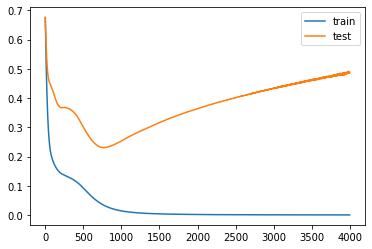

In [4]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Epoch 00001: val_accuracy improved from -inf to 0.72857, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.72857

Epoch 00003: val_accuracy did not improve from 0.72857

Epoch 00004: val_accuracy did not improve from 0.72857

Epoch 00005: val_accuracy did not improve from 0.72857

Epoch 00006: val_accuracy did not improve from 0.72857

Epoch 00007: val_accuracy did not improve from 0.72857

Epoch 00008: val_accuracy did not improve from 0.72857

Epoch 00009: val_accuracy did not improve from 0.72857

Epoch 00010: val_accuracy did not improve from 0.72857

Epoch 00011: val_accuracy did not improve from 0.72857

Epoch 00012: val_accuracy did not improve from 0.72857

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy did not improve from 0.72857

Epoch 00015: val_accuracy did not improve from 0.72857

Epoch 00016: val_accuracy did not improve from 0.72857

Epoch 00017: val_accuracy did not improve from 0.72857

Epoch 00018: va


Epoch 00165: val_accuracy did not improve from 0.82857

Epoch 00166: val_accuracy did not improve from 0.82857

Epoch 00167: val_accuracy did not improve from 0.82857

Epoch 00168: val_accuracy did not improve from 0.82857

Epoch 00169: val_accuracy did not improve from 0.82857

Epoch 00170: val_accuracy did not improve from 0.82857

Epoch 00171: val_accuracy did not improve from 0.82857

Epoch 00172: val_accuracy did not improve from 0.82857

Epoch 00173: val_accuracy did not improve from 0.82857

Epoch 00174: val_accuracy did not improve from 0.82857

Epoch 00175: val_accuracy did not improve from 0.82857

Epoch 00176: val_accuracy did not improve from 0.82857

Epoch 00177: val_accuracy did not improve from 0.82857

Epoch 00178: val_accuracy did not improve from 0.82857

Epoch 00179: val_accuracy did not improve from 0.82857

Epoch 00180: val_accuracy did not improve from 0.82857

Epoch 00181: val_accuracy did not improve from 0.82857

Epoch 00182: val_accuracy did not improve from 

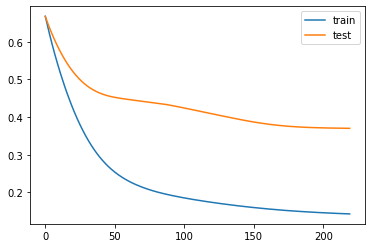

0.8285714387893677

In [5]:
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
# try with patience 1 and 200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
test_acc


Epoch 00001: val_accuracy did not improve from 0.82857

Epoch 00002: val_accuracy did not improve from 0.82857

Epoch 00003: val_accuracy did not improve from 0.82857

Epoch 00004: val_accuracy did not improve from 0.82857

Epoch 00005: val_accuracy did not improve from 0.82857

Epoch 00006: val_accuracy did not improve from 0.82857

Epoch 00007: val_accuracy did not improve from 0.82857

Epoch 00008: val_accuracy did not improve from 0.82857

Epoch 00009: val_accuracy did not improve from 0.82857

Epoch 00010: val_accuracy did not improve from 0.82857

Epoch 00011: val_accuracy did not improve from 0.82857

Epoch 00012: val_accuracy did not improve from 0.82857

Epoch 00013: val_accuracy did not improve from 0.82857

Epoch 00014: val_accuracy did not improve from 0.82857

Epoch 00015: val_accuracy did not improve from 0.82857

Epoch 00016: val_accuracy did not improve from 0.82857

Epoch 00017: val_accuracy did not improve from 0.82857

Epoch 00018: val_accuracy did not improve from 


Epoch 00150: val_accuracy did not improve from 0.82857

Epoch 00151: val_accuracy did not improve from 0.82857

Epoch 00152: val_accuracy did not improve from 0.82857

Epoch 00153: val_accuracy did not improve from 0.82857

Epoch 00154: val_accuracy did not improve from 0.82857

Epoch 00155: val_accuracy did not improve from 0.82857

Epoch 00156: val_accuracy did not improve from 0.82857

Epoch 00157: val_accuracy did not improve from 0.82857

Epoch 00158: val_accuracy did not improve from 0.82857

Epoch 00159: val_accuracy did not improve from 0.82857

Epoch 00160: val_accuracy did not improve from 0.82857

Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0.82857

Epoch 00163: val_accuracy did not improve from 0.82857

Epoch 00164: val_accuracy did not improve from 0.82857

Epoch 00165: val_accuracy did not improve from 0.82857

Epoch 00166: val_accuracy did not improve from 0.82857

Epoch 00167: val_accuracy did not improve from 


Epoch 00327: val_accuracy did not improve from 0.82857

Epoch 00328: val_accuracy did not improve from 0.82857

Epoch 00329: val_accuracy did not improve from 0.82857

Epoch 00330: val_accuracy did not improve from 0.82857

Epoch 00331: val_accuracy did not improve from 0.82857

Epoch 00332: val_accuracy did not improve from 0.82857

Epoch 00333: val_accuracy did not improve from 0.82857

Epoch 00334: val_accuracy did not improve from 0.82857

Epoch 00335: val_accuracy did not improve from 0.82857

Epoch 00336: val_accuracy did not improve from 0.82857

Epoch 00337: val_accuracy improved from 0.82857 to 0.84286, saving model to best_model.h5

Epoch 00338: val_accuracy did not improve from 0.84286

Epoch 00339: val_accuracy did not improve from 0.84286

Epoch 00340: val_accuracy did not improve from 0.84286

Epoch 00341: val_accuracy did not improve from 0.84286

Epoch 00342: val_accuracy did not improve from 0.84286

Epoch 00343: val_accuracy did not improve from 0.84286

Epoch 00344:


Epoch 00477: val_accuracy did not improve from 0.84286

Epoch 00478: val_accuracy did not improve from 0.84286

Epoch 00479: val_accuracy did not improve from 0.84286

Epoch 00480: val_accuracy did not improve from 0.84286

Epoch 00481: val_accuracy did not improve from 0.84286

Epoch 00482: val_accuracy did not improve from 0.84286

Epoch 00483: val_accuracy did not improve from 0.84286

Epoch 00484: val_accuracy did not improve from 0.84286

Epoch 00485: val_accuracy did not improve from 0.84286

Epoch 00486: val_accuracy did not improve from 0.84286

Epoch 00487: val_accuracy did not improve from 0.84286

Epoch 00488: val_accuracy did not improve from 0.84286

Epoch 00489: val_accuracy did not improve from 0.84286

Epoch 00490: val_accuracy did not improve from 0.84286

Epoch 00491: val_accuracy did not improve from 0.84286

Epoch 00492: val_accuracy did not improve from 0.84286

Epoch 00493: val_accuracy did not improve from 0.84286

Epoch 00494: val_accuracy did not improve from 


Epoch 00624: val_accuracy did not improve from 0.84286

Epoch 00625: val_accuracy did not improve from 0.84286

Epoch 00626: val_accuracy did not improve from 0.84286

Epoch 00627: val_accuracy did not improve from 0.84286

Epoch 00628: val_accuracy did not improve from 0.84286

Epoch 00629: val_accuracy did not improve from 0.84286

Epoch 00630: val_accuracy did not improve from 0.84286

Epoch 00631: val_accuracy did not improve from 0.84286

Epoch 00632: val_accuracy did not improve from 0.84286

Epoch 00633: val_accuracy did not improve from 0.84286

Epoch 00634: val_accuracy did not improve from 0.84286

Epoch 00635: val_accuracy did not improve from 0.84286

Epoch 00636: val_accuracy did not improve from 0.84286

Epoch 00637: val_accuracy did not improve from 0.84286

Epoch 00638: val_accuracy did not improve from 0.84286

Epoch 00639: val_accuracy did not improve from 0.84286

Epoch 00640: val_accuracy did not improve from 0.84286

Epoch 00641: val_accuracy did not improve from 


Epoch 00770: val_accuracy did not improve from 0.91429

Epoch 00771: val_accuracy did not improve from 0.91429

Epoch 00772: val_accuracy did not improve from 0.91429

Epoch 00773: val_accuracy did not improve from 0.91429

Epoch 00774: val_accuracy did not improve from 0.91429

Epoch 00775: val_accuracy did not improve from 0.91429

Epoch 00776: val_accuracy did not improve from 0.91429

Epoch 00777: val_accuracy did not improve from 0.91429

Epoch 00778: val_accuracy did not improve from 0.91429

Epoch 00779: val_accuracy did not improve from 0.91429

Epoch 00780: val_accuracy did not improve from 0.91429

Epoch 00781: val_accuracy did not improve from 0.91429

Epoch 00782: val_accuracy did not improve from 0.91429

Epoch 00783: val_accuracy did not improve from 0.91429

Epoch 00784: val_accuracy did not improve from 0.91429

Epoch 00785: val_accuracy did not improve from 0.91429

Epoch 00786: val_accuracy did not improve from 0.91429

Epoch 00787: val_accuracy did not improve from 


Epoch 00949: val_accuracy did not improve from 0.92857

Epoch 00950: val_accuracy did not improve from 0.92857

Epoch 00951: val_accuracy did not improve from 0.92857

Epoch 00952: val_accuracy did not improve from 0.92857

Epoch 00953: val_accuracy did not improve from 0.92857

Epoch 00954: val_accuracy did not improve from 0.92857

Epoch 00955: val_accuracy did not improve from 0.92857

Epoch 00956: val_accuracy did not improve from 0.92857

Epoch 00957: val_accuracy did not improve from 0.92857

Epoch 00958: val_accuracy did not improve from 0.92857

Epoch 00959: val_accuracy did not improve from 0.92857

Epoch 00960: val_accuracy did not improve from 0.92857

Epoch 00961: val_accuracy did not improve from 0.92857

Epoch 00962: val_accuracy did not improve from 0.92857

Epoch 00963: val_accuracy did not improve from 0.92857

Epoch 00964: val_accuracy did not improve from 0.92857

Epoch 00965: val_accuracy did not improve from 0.92857

Epoch 00966: val_accuracy did not improve from 


Epoch 01122: val_accuracy did not improve from 0.94286

Epoch 01123: val_accuracy did not improve from 0.94286

Epoch 01124: val_accuracy did not improve from 0.94286

Epoch 01125: val_accuracy did not improve from 0.94286

Epoch 01126: val_accuracy did not improve from 0.94286

Epoch 01127: val_accuracy did not improve from 0.94286

Epoch 01128: val_accuracy did not improve from 0.94286

Epoch 01129: val_accuracy did not improve from 0.94286

Epoch 01130: val_accuracy did not improve from 0.94286

Epoch 01131: val_accuracy did not improve from 0.94286

Epoch 01132: val_accuracy did not improve from 0.94286

Epoch 01133: val_accuracy did not improve from 0.94286

Epoch 01134: val_accuracy did not improve from 0.94286

Epoch 01135: val_accuracy did not improve from 0.94286

Epoch 01136: val_accuracy did not improve from 0.94286

Epoch 01137: val_accuracy did not improve from 0.94286

Epoch 01138: val_accuracy did not improve from 0.94286

Epoch 01139: val_accuracy did not improve from 

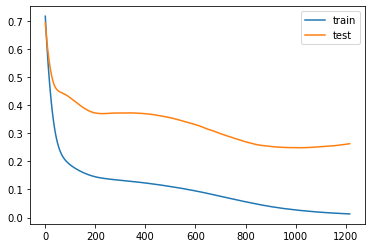

0.9428571462631226

In [8]:
# Change patience from 1 to 200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
test_acc

patience = 1   --> acc = 0.83
patience = 200 --> acc = 0.94